# Praxisprojekt Auswertung

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import OrderedDict

matplotlib.rcParams["figure.dpi"] = 200
matplotlib.rcParams['savefig.dpi'] = 300
matplotlib.rcParams['font.family'] = 'Source Sans Pro'
matplotlib.rc('hatch', color='white', linewidth=0.4)

In [2]:
classical_names = ["P-256","P-384","P-521","ed25519","ed448","X25519","X448","rsa:3072","rsa:7680","rsa:15360"]

def get_color(kem_alg, sig_alg):
    if kem_alg in classical_names and sig_alg in classical_names:
        return 'orange'
    elif kem_alg in classical_names or sig_alg in classical_names:
        return 'purple'
    return 'blue'

In [3]:
df = pd.read_csv("./raw_results/results_10s.csv")
df['connections_sec'] = df.apply(lambda row: [row.connections_sec], axis=1)

for i in range(1, 5):
    tmp = pd.read_csv(f"./raw_results/results_10s_{i}.csv")
    df.apply(lambda row: row.connections_sec.append(tmp["connections_sec"][row.name]), axis=1)
    

df['algs'] = df.apply(lambda row: f"{row.kem_alg} {row.sig_alg}", axis=1)
df['color'] = df.apply(lambda row: get_color(row.kem_alg, row.sig_alg), axis=1)
df['mean'] = df.apply(lambda row: np.mean(row.connections_sec), axis=1)
df['std'] = df.apply(lambda row: np.std(row.connections_sec), axis=1)

df.to_csv("./proc_results/results_10s_acc.csv")

NIST_levels = [1,3,5]

grouped = df.groupby(df.nist_level)

for level in NIST_levels:
    print(grouped.get_group(level).head(3))

   nist_level kem_alg    sig_alg  \
0           1  X25519   rsa:3072   
1           1  X25519    ed25519   
2           1  X25519  falcon512   

                                 connections_sec              algs   color  \
0     [1275.49, 1350.0, 1304.9, 1275.73, 1294.5]   X25519 rsa:3072  orange   
1  [1085.42, 1095.81, 1104.58, 1095.11, 1080.49]    X25519 ed25519  orange   
2  [1473.68, 1497.33, 1401.25, 1461.04, 1439.74]  X25519 falcon512  purple   

       mean        std  
0  1300.124  27.364050  
1  1092.282   8.459592  
2  1454.608  32.552772  
    nist_level kem_alg     sig_alg                           connections_sec  \
36           3    X448    rsa:7680    [350.0, 342.31, 333.33, 325.93, 362.5]   
37           3    X448       ed448   [264.48, 264.68, 260.95, 265.2, 263.28]   
38           3    X448  dilithium3  [402.66, 405.63, 413.87, 417.52, 410.27]   

               algs   color     mean        std  
36    X448 rsa:7680  orange  342.814  12.762813  
37       X448 ed448  

In [4]:
aliases = {
    "X25519": "ECDH Curve25519ᵏ",
    "P-256": "ECDH P-256ᵏ",
    "lightsaber": "LightSaber", 
    "kyber512": "Kyber512", 
    "hqc128": "HQC-128", 
    "sidhp434": "SIDH-p434",
    "X448": "ECDH Curve448ᵏ",
    "P-384": "ECDH P-384ᵏ",
    "saber": "Saber", 
    "kyber768": "Kyber768", 
    "hqc192": "HQC-192", 
    "sidhp610": "SIDH-p610",
    "P-521": "ECDH P-521ᵏ",
    "firesaber": "FireSaber", 
    "kyber1024": "Kyber1024", 
    "hqc256": "HQC-256", 
    "sidhp751": "SIDH-p751",
    "rsa:3072": "RSA-3072ᵏ",
    "ed25519": "EdDSA Curve25519ᵏ",
    "falcon512": "Falcon-512", 
    "dilithium2": "Dilithium2", 
    "rainbowIclassic": "Rainbow-I-Classic", 
    "sphincsshake256128frobust": "SPHINCS+-SHAKE256-\n128f-Robust",
    "rsa:7680": "RSA-7680ᵏ",
    "ed448": "EdDSA Curve448ᵏ",
    "dilithium3": "Dilithium3", 
    "rainbowIIIclassic": "Rainbow-III-Classic", 
    "sphincsshake256192frobust": "SPHINCS+-SHAKE256-\n192f-Robust",
    "rsa:15360": "RSA-15360ᵏ",
    "falcon1024": "Falcon-1024", 
    "dilithium5": "Dilithium5", 
    "rainbowVclassic": "Rainbow-V-Classic", 
    "sphincsshake256256frobust": "SPHINCS+-SHAKE256-\n256f-Robust"
}

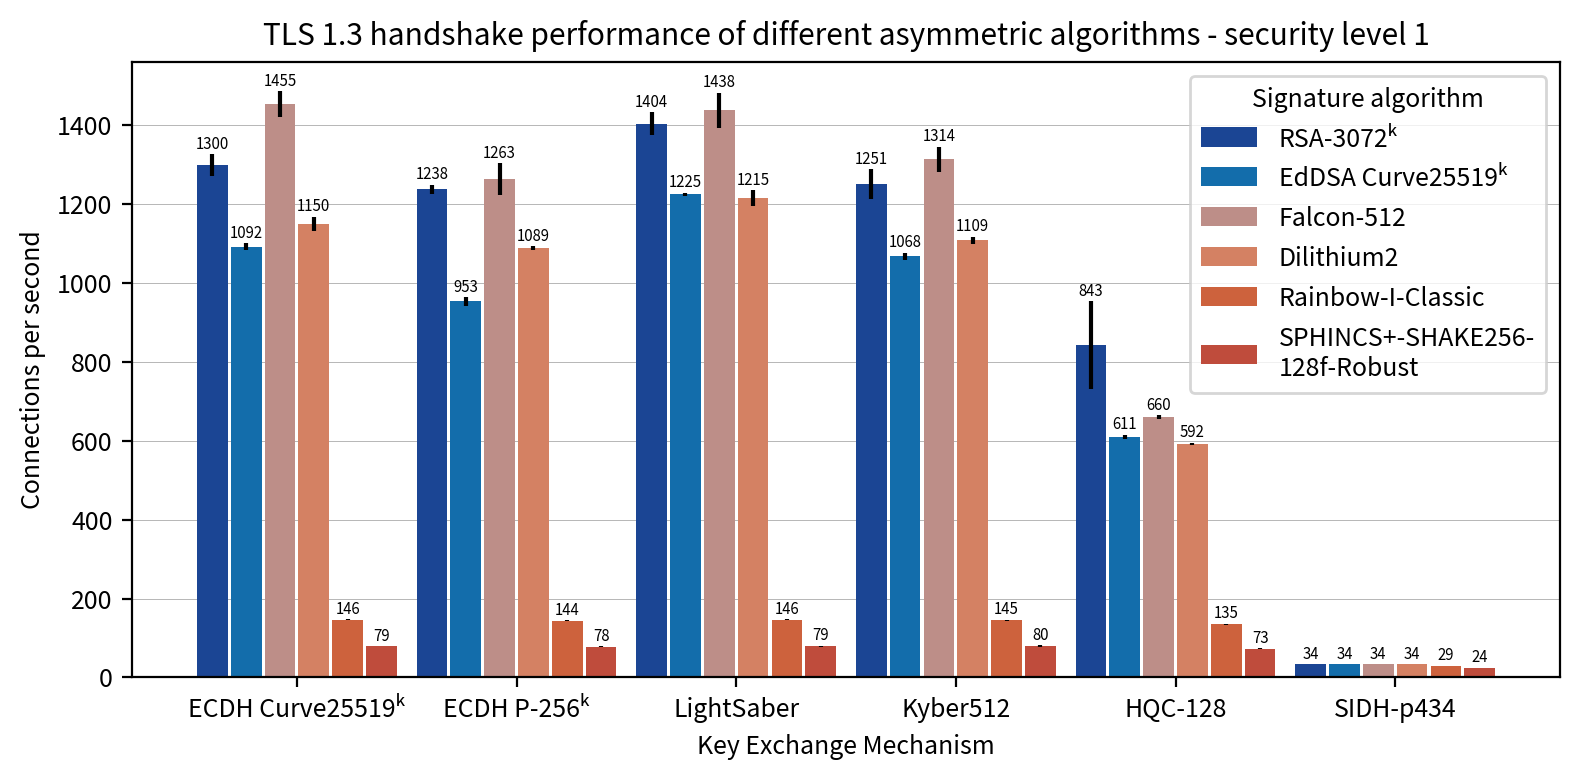

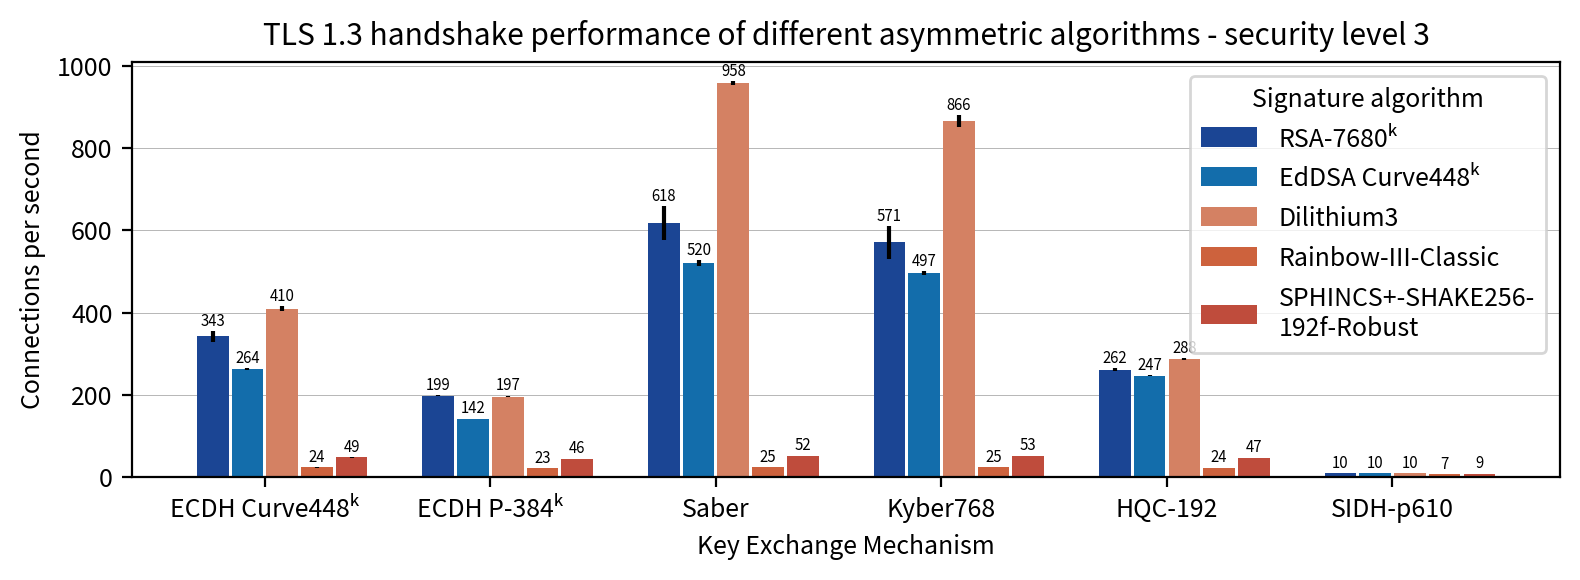

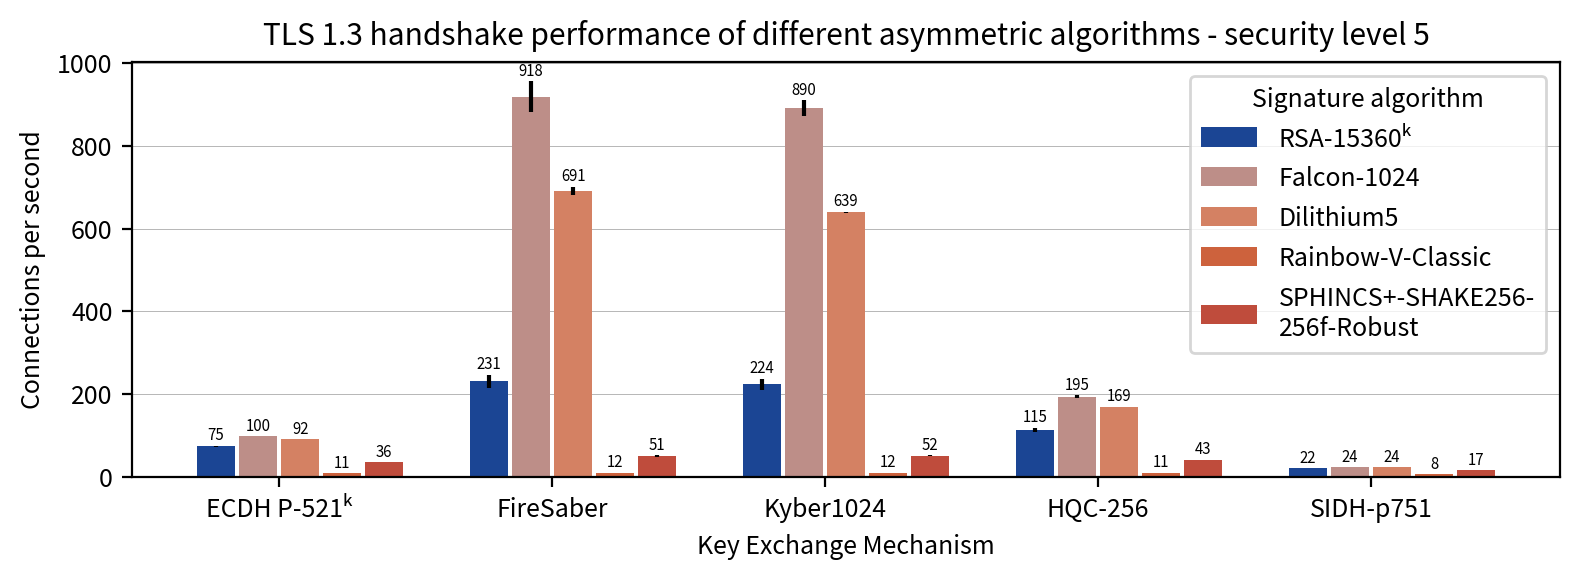

In [5]:
color_map = {
    1: ["#1b4594", "#136DAB", "#BD8E88", "#D48163", "#CD623D", "#BF4C3C"],
    3: ["#1b4594", "#136DAB", "#D48163", "#CD623D", "#BF4C3C"],
    5: ["#1b4594", "#BD8E88", "#D48163", "#CD623D", "#BF4C3C"]
}

for level in NIST_levels:
    group = grouped.get_group(level)

    labels = list(OrderedDict.fromkeys(group.kem_alg.values))
    aliased_labels = []
    for label in labels:
        aliased_labels.append(aliases[label])
    sig_algs = list(OrderedDict.fromkeys(group.sig_alg.values))

    x = np.arange(len(labels))  # the label locations
    width = 0.14  # the width of the bars

    fig, ax = plt.subplots()

    # fig.set_figheight(5.4) if level == 1 else fig.set_figheight(3.8)
    # fig.set_figwidth(10)
    fig.set_figheight(4) if level == 1 else fig.set_figheight(3)
    fig.set_figwidth(8)

    rects = []

    colors = color_map[level]
    length = len(sig_algs)

    add = False
    if length % 2 != 0:
        add = True
    
    for i in range(-(length // 2), length // 2 if not add else (length // 2) + 1):
        index = i + (length // 2)
        sig_alg = sig_algs[index]
        means = []
        stds = []
        for kem_alg in labels:
            tmp = group.loc[(group["kem_alg"] == kem_alg) & (group["sig_alg"] == sig_alg)]
            means.append(tmp["mean"].values[0])
            stds.append(tmp["std"].values[0])
        pos = x + (width * i *1.1) + (width/2 *1.1)
        label = aliases[sig_alg]
        rects.append(ax.bar(pos, means, width, label=label, color=colors[index], yerr=stds))

    ax.set_axisbelow(True)
    ax.grid(True, axis="y", color='grey', linewidth=0.2)
    ax.set_xlabel('Key Exchange Mechanism')
    ax.set_ylabel('Connections per second')
    ax.set_title(f'TLS 1.3 handshake performance of different asymmetric algorithms - security level {level}')
    ax.set_xticks(x, aliased_labels)
    ax.legend(title="Signature algorithm")

    for rect in rects:
        ax.bar_label(rect, padding=0.5, fmt="%.0f", fontsize=6)

    fig.tight_layout()
    plt.savefig(f"./figures/results_l{level}.png", transparent=True)
    plt.show()


## Signaturalgorithmen raw speed

In [6]:
df = pd.read_csv("./proc_results/openssl_speed_sig.csv")

df = df[df.algorithm.isin(list(aliases.keys()))]

grouped = df.groupby(df.level)

for level in NIST_levels:
    print(grouped.get_group(level).head(3))

   level  algorithm   sign_s  verify_s
3      1   rsa:3072    160.6    8094.1
7      1    ed25519  12662.3    3799.5
9      1  falcon512    120.3   10435.7
    level   algorithm  sign_s  verify_s
5       3    rsa:7680     9.1    1348.4
8       3       ed448  1771.8     980.3
17      3  dilithium3   696.3    3170.8
    level   algorithm  sign_s  verify_s
6       5   rsa:15360     1.5     343.8
12      5  falcon1024    55.0    5142.2
19      5  dilithium5   583.1    1977.2


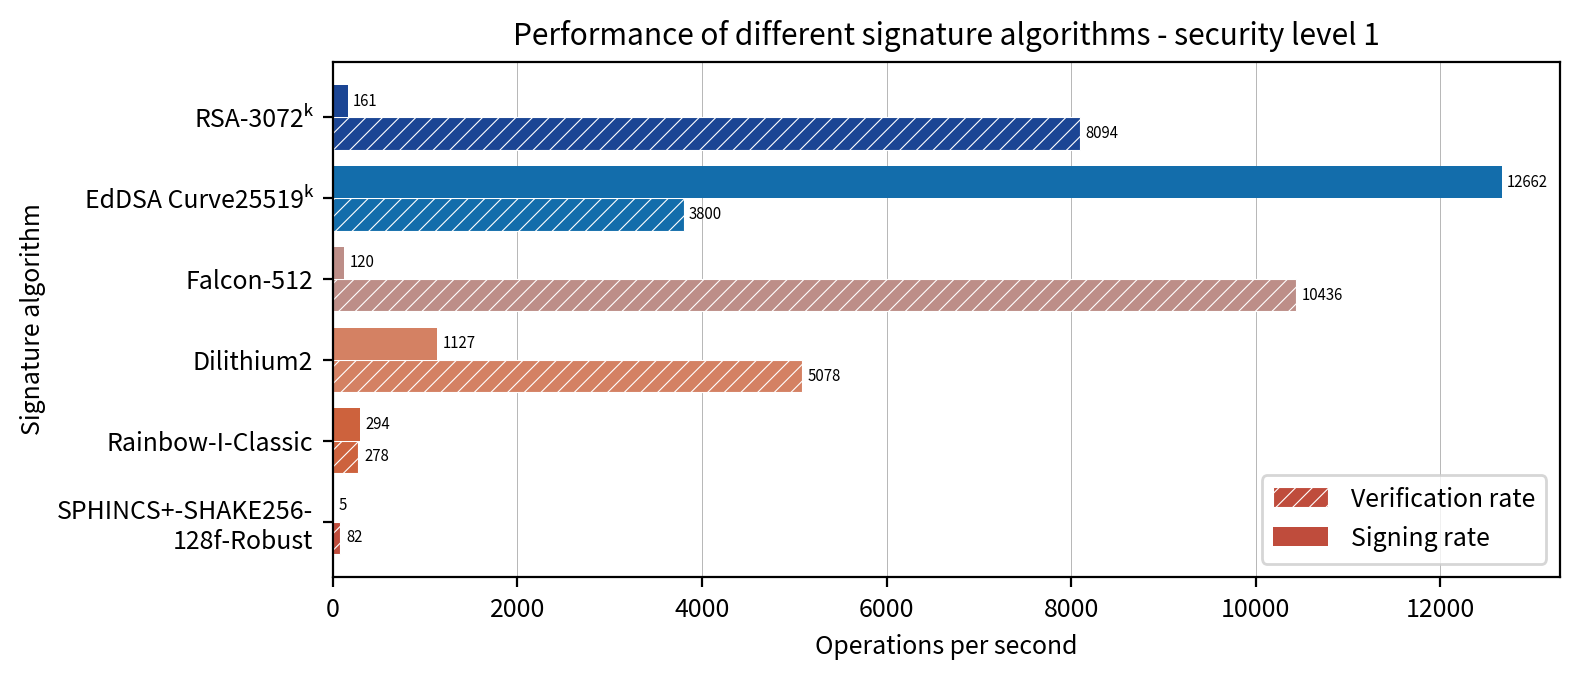

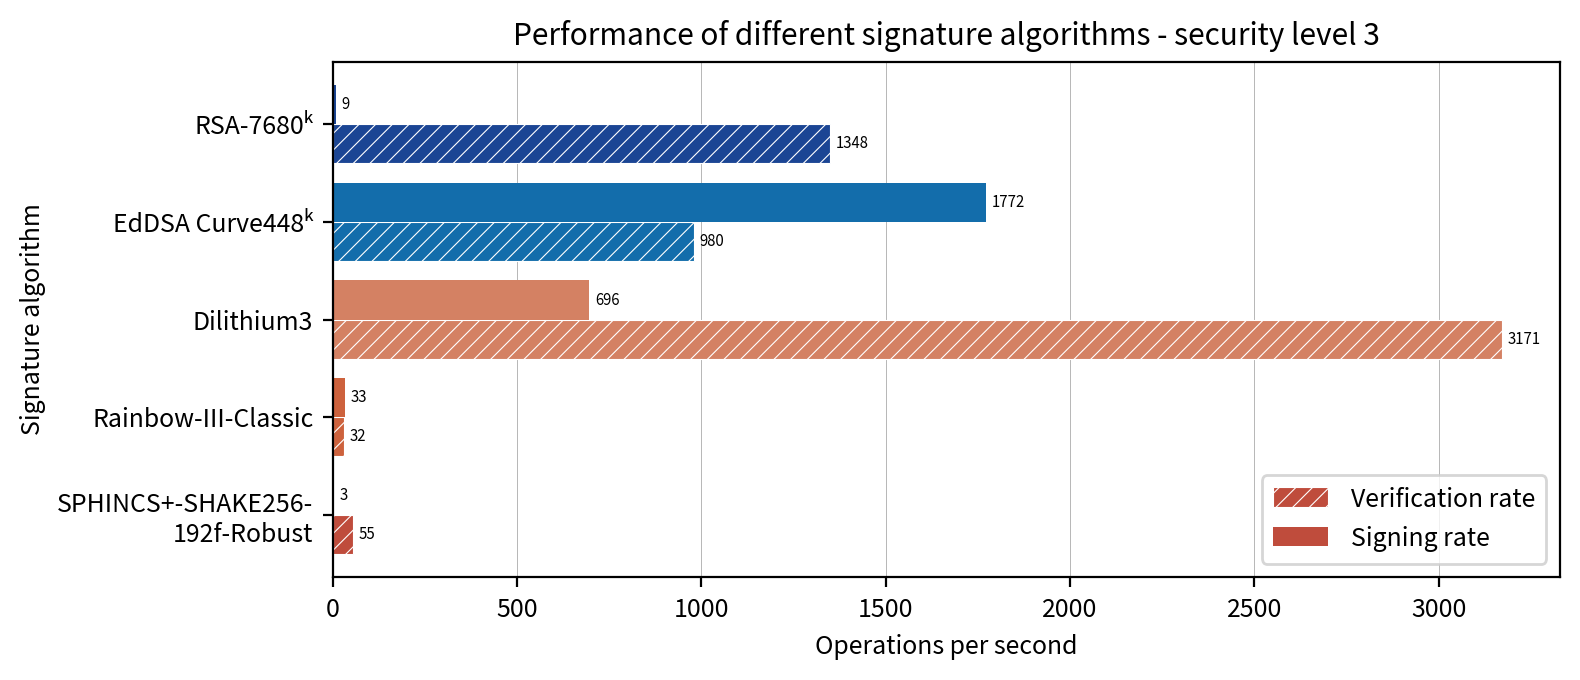

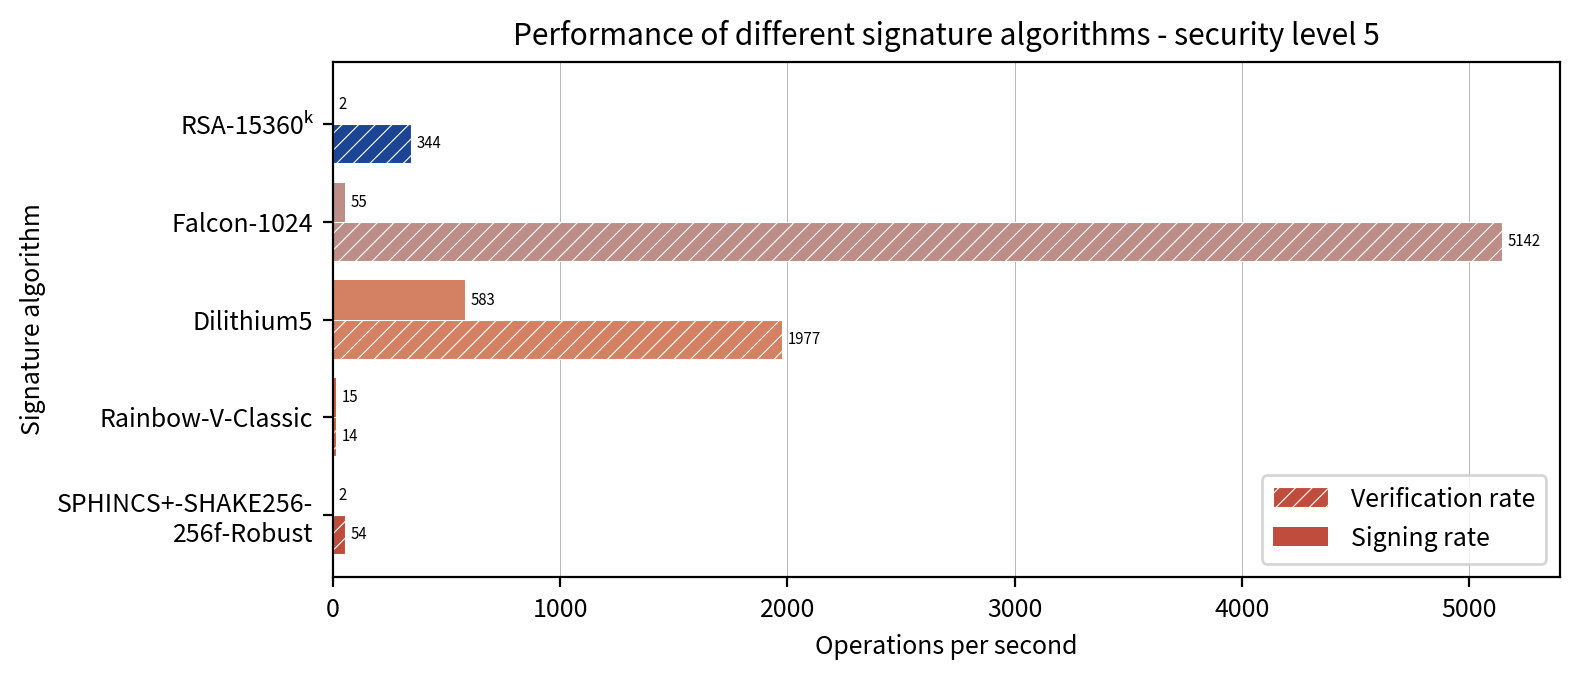

In [7]:
for level in NIST_levels:
    group = grouped.get_group(level).iloc[::-1]

    labels = group.algorithm.values
    aliased_labels = []
    for label in labels:
        aliased_labels.append(aliases[label])
    verify_s = group.verify_s.values
    sign_s = group.sign_s.values

    y = np.arange(len(labels))  # the label locations
    height = 0.4  # the width of the bars

    fig, ax = plt.subplots()
    fig.set_figheight(3.5)
    fig.set_figwidth(8)
    rects1 = ax.barh(y - height/2, verify_s, height=height, label='Verification rate', color=color_map[level][::-1], hatch="////", edgecolor="white", linewidth=0.4)
    rects2 = ax.barh(y + height/2, sign_s, height=height, label='Signing rate', color=color_map[level][::-1])

    ax.set_axisbelow(True)
    ax.grid(True, axis="x", color='grey', linewidth=0.2)
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Signature algorithm')
    ax.set_xlabel('Operations per second')
    ax.set_title(f'Performance of different signature algorithms - security level {level}')
    ax.set_yticks(y, aliased_labels)
    ax.legend(loc="lower right")

    ax.bar_label(rects1, padding=2, fmt="%.0f", fontsize=6)
    ax.bar_label(rects2, padding=2, fmt="%.0f", fontsize=6)

    fig.tight_layout()

    plt.savefig(f"./figures/sig_results_l{level}.png", transparent=True)
    plt.show()

## KEM-Algorithmen raw speed

In [8]:
df = pd.read_csv("./proc_results/openssl_speed_kem.csv")

df = df[df.algorithm.isin(list(aliases.keys()))]

grouped = df.groupby(df.level)

for level in NIST_levels:
    print(grouped.get_group(level))

    level   algorithm  keygen_s  encap_s  decap_s
6       1  lightsaber   17349.7  14872.2  14327.1
9       1    kyber512   13154.3  10071.7   8639.6
18      1      hqc128    4629.9   2258.8   1518.7
21      1    sidhp434      64.1     31.2     78.9
    level algorithm  keygen_s  encap_s  decap_s
7       3     saber   10042.2   8580.1   8078.3
10      3  kyber768    8263.0   6601.4   5729.1
19      3    hqc192    1796.0    845.8    584.5
23      3  sidhp610      19.4     10.4     23.2
    level  algorithm  keygen_s  encap_s  decap_s
8       5  firesaber    6317.9   5567.2   4911.2
11      5  kyber1024    5477.6   4600.4   4045.6
20      5     hqc256     973.4    452.9    311.3
24      5   sidhp751      46.0     22.0     55.9


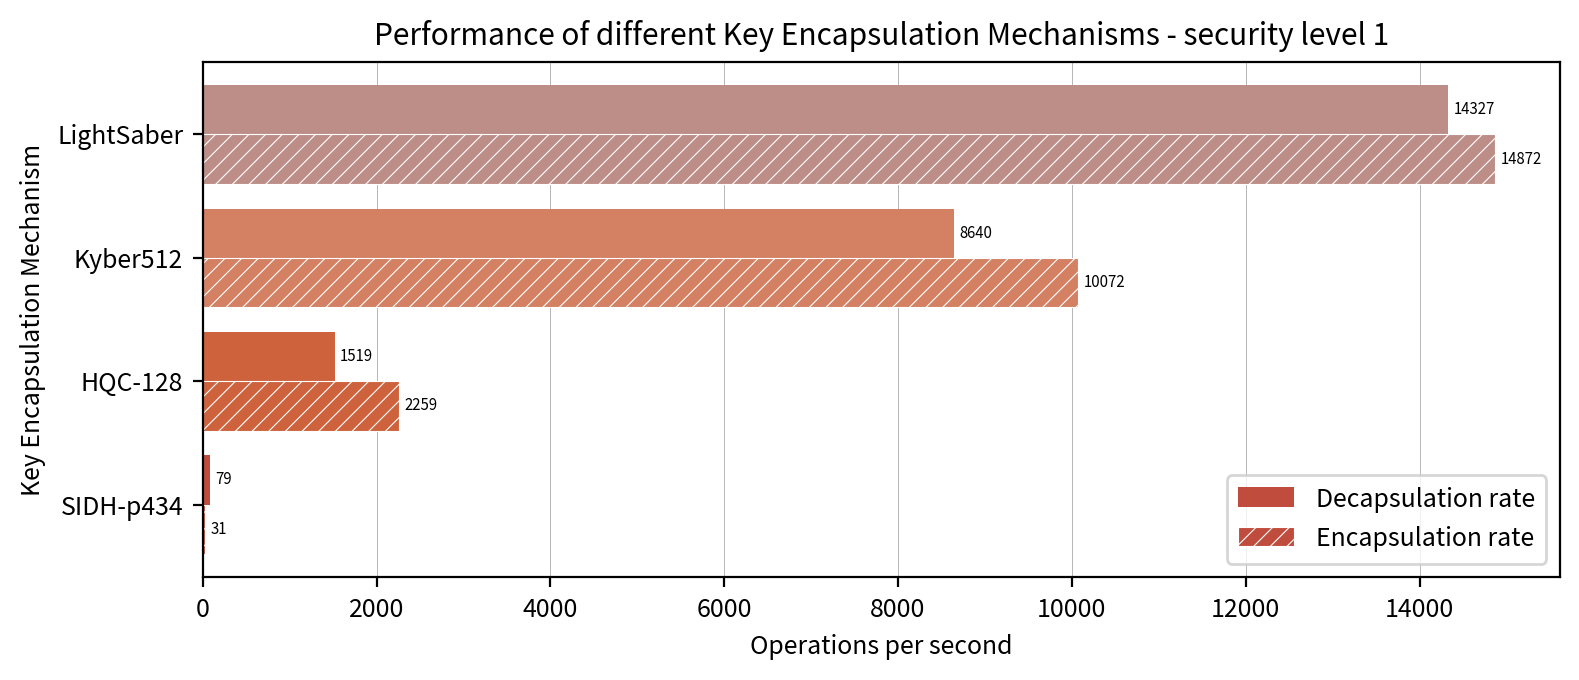

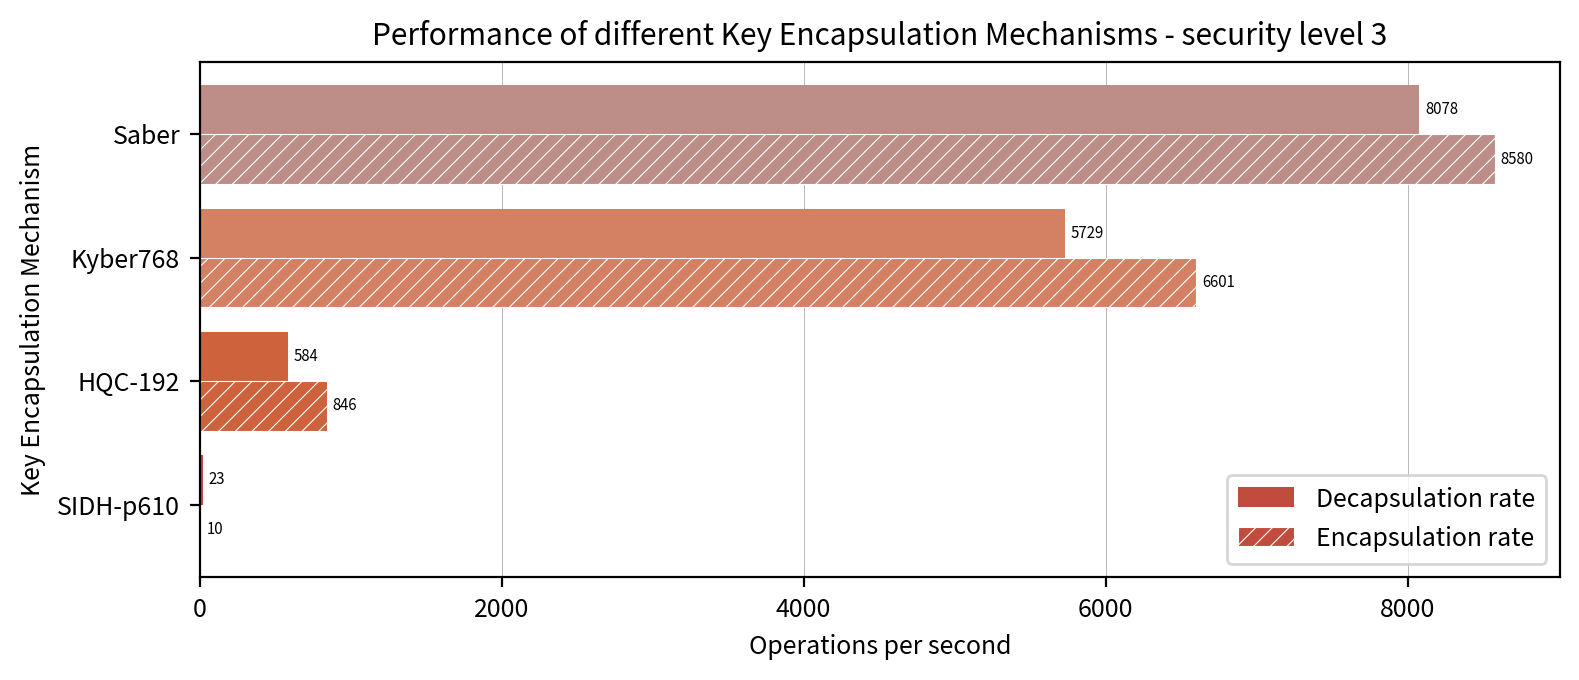

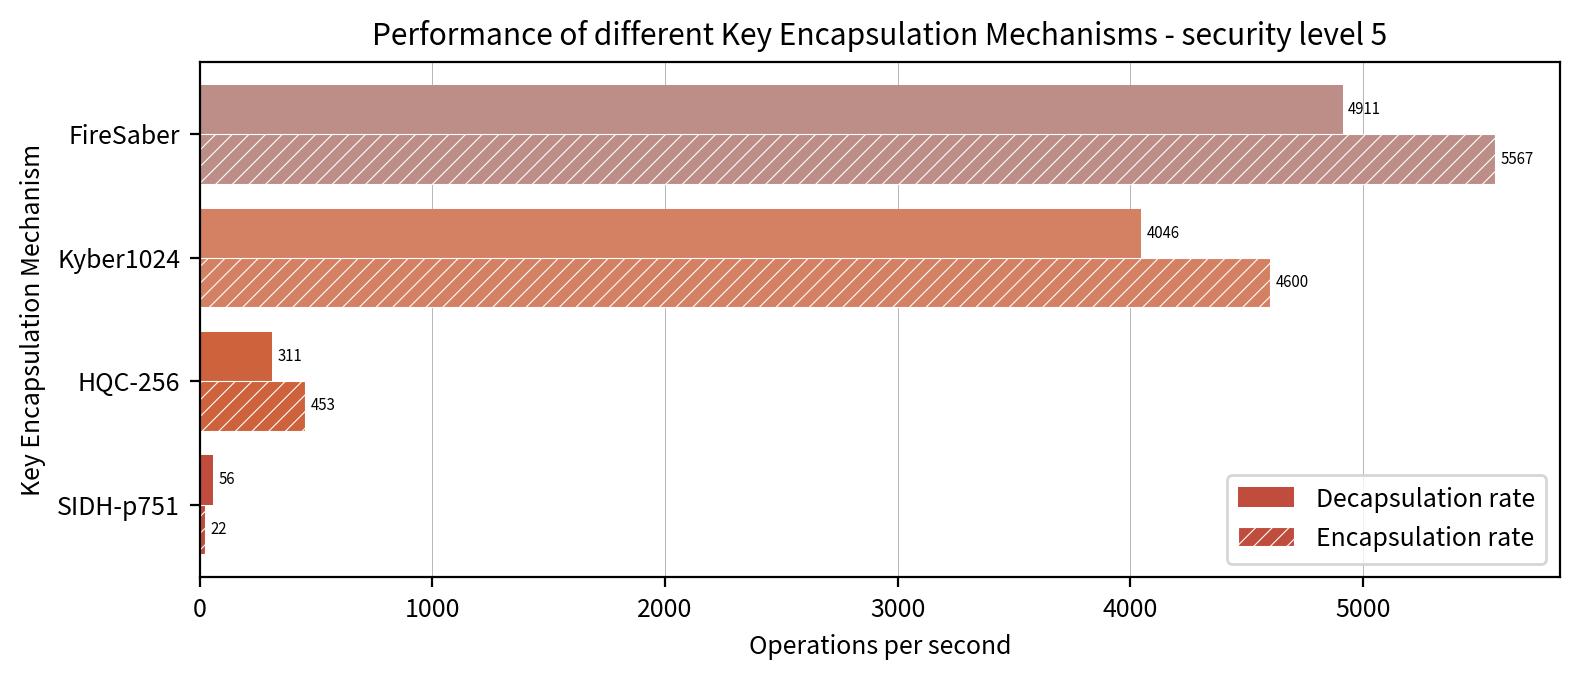

In [9]:
color_map = {
    1: ["#BD8E88", "#D48163", "#CD623D", "#BF4C3C"],
    3: ["#BD8E88", "#D48163", "#CD623D", "#BF4C3C"],
    5: ["#BD8E88", "#D48163", "#CD623D", "#BF4C3C"],
}

for level in NIST_levels:
    group = grouped.get_group(level).iloc[::-1]

    labels = group.algorithm.values
    aliased_labels = []
    for label in labels:
        aliased_labels.append(aliases[label])
    decap_s = group.decap_s.values
    encap_s = group.encap_s.values

    y = np.arange(len(labels))  # the label locations
    height = 0.4  # the width of the bars

    fig, ax = plt.subplots()
    fig.set_figheight(3.5)
    fig.set_figwidth(8)
    rects1 = ax.barh(y + height/2, decap_s, height=height, label='Decapsulation rate', color=color_map[level][::-1])
    rects2 = ax.barh(y - height/2, encap_s, height=height, label='Encapsulation rate', color=color_map[level][::-1], hatch="////", edgecolor="white", linewidth=0.4)

    ax.set_axisbelow(True)
    ax.grid(True, axis="x", color='grey', linewidth=0.2)
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Key Encapsulation Mechanism')
    ax.set_xlabel('Operations per second')
    ax.set_title(f'Performance of different Key Encapsulation Mechanisms - security level {level}')
    ax.set_yticks(y, aliased_labels)
    ax.legend(loc="lower right")

    ax.bar_label(rects1, padding=2, fmt="%.0f", fontsize=6)
    ax.bar_label(rects2, padding=2, fmt="%.0f", fontsize=6)

    fig.tight_layout()

    plt.savefig(f"./figures/kem_results_l{level}.png", transparent=True)
    plt.show()